# Prediction of Infect_Prob (Covid-19) in Test Dataset

- <b>Using Support Vector Regression predicting the Infect_Prob of Test Dataset.</b> 
- <b>Doing Preprocessing of Train Dataset since most of the data are missing and are in String value, so I have dropped some attribute, filled the missing data with the most frequent data and used label encoder to convert categorical data to contionous data.</b>
- <b>During the training the dataset I have used rbf kernal with random value of gamma and C and didn't went with other kernel due to it was taking a lot of time to train. Even though I tried using the <u>Grid Search Optimization</u> to get the best model but it took a lot of time to give best model.So, with time constaint I went with Rbf Kernel.</b>
- <b>While predicting the better model in SVR through Train Dataset it comes out that Linear kernel has better Mean Absolute Error, Squared Mean Error compare to rbf kernel.</b>
- <b>Since the Linear kernel model took a lot of time and I was not able to train. Therefore I decided to go with Rbf kernel since Mean Absolute Error, Squared Mean Error not differ much compare to Linear kernel as given below. </b>
- <b> Output is Infect_prob with People_id is in the form of excel sheet "part1.xlsx".</b>

## Finding Best Model in SVR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds = pd.read_excel("Train_dataset.xlsx",sheet_name = "Train_dataset")
ds1 = pd.read_excel("Test_dataset.xlsx")
ds2= pd.read_excel("Test_dataset.xlsx")

In [3]:
ds.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [4]:
ds1.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,...,109,207,312,94,68,39,5,2300000,1500000,1


### Dropping of attribute

In [5]:
ds.drop(["salary","Insurance","Married","Children","people_ID","Designation","Name"], axis = 1, inplace = True)

In [6]:
ds.head()

,Region,Gender,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,...,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,Bhubaneshwar,Female,Farmer,Public,2,0,Hypertension,68,8,<400,...,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010
1,Bhubaneshwar,Female,Farmer,Walk,2,0,Diabetes,64,15,<100,...,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880
2,Bhubaneshwar,Female,Cleaner,Public,2,0,None,19,13,<300,...,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000
3,Bhubaneshwar,Female,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,...,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225
4,Bhubaneshwar,Female,Manufacturing,Car,2,0,Diabetes,23,7,<400,...,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800


### Filling Missing Values

In [7]:
ds_null = ds.columns[ds.isnull().any()]
ds[ds_null].isnull().sum()

Occupation                 747
Mode_transport               3
comorbidity                226
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
FT/month                   723
dtype: int64

In [8]:
ds_categ = list(ds.select_dtypes(exclude = ["number"]).columns)
ds_categ

['Region',
 'Gender',
 'Occupation',
 'Mode_transport',
 'comorbidity',
 'Pulmonary score',
 'cardiological pressure']

In [9]:
ds["Mode_transport"].fillna(method ='ffill', inplace = True)
ds["comorbidity"].fillna(method ='ffill', inplace = True)
ds["cardiological pressure"].fillna(method ='ffill', inplace = True)
ds["Diuresis"].fillna(method ='ffill', inplace = True)
ds["Platelets"].fillna(method ='ffill', inplace = True)
ds["HBB"].fillna(method ='ffill', inplace = True)
ds["d-dimer"].fillna(method ='ffill', inplace = True)
ds["Heart rate"].fillna(method ='ffill', inplace = True)
ds["HDL cholesterol"].fillna(method ='ffill', inplace = True)
ds["FT/month"].fillna(method ='ffill', inplace = True)
ds["Occupation"].fillna(method ='ffill', inplace = True)

In [10]:
ds.head()

,Region,Gender,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,...,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,Bhubaneshwar,Female,Farmer,Public,2,0,Hypertension,68,8,<400,...,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010
1,Bhubaneshwar,Female,Farmer,Walk,2,0,Diabetes,64,15,<100,...,441.0,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880
2,Bhubaneshwar,Female,Cleaner,Public,2,0,None,19,13,<300,...,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000
3,Bhubaneshwar,Female,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,...,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225
4,Bhubaneshwar,Female,Manufacturing,Car,2,0,Diabetes,23,7,<400,...,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800


In [11]:
ds_categ = list(ds.select_dtypes(exclude = ["number"]).columns)
ds_categ

['Region',
 'Gender',
 'Occupation',
 'Mode_transport',
 'comorbidity',
 'Pulmonary score',
 'cardiological pressure']

### Converting Categorical Value to Continous Value using Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ds_categ:
    print(ds[i].unique())
    ds[i] = le.fit_transform(ds[i])

['Bhubaneshwar' 'Chandigarh' 'Chennai' 'Delhi' 'Bengaluru']
['Female' 'Male']
['Farmer' 'Cleaner' 'Driver' 'Manufacturing' 'Clerk' 'Sales' 'Business'
 'Researcher' 'Legal']
['Public' 'Walk' 'Car']
['Hypertension' 'Diabetes' 'None' 'Coronary Heart Disease']
['<400' '<100' '<300' '<200']
['Normal' 'Stage-02' 'Elevated' 'Stage-01']


In [13]:
ds.head()

,Region,Gender,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,...,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,1,0,4,1,2,0,2,68,8,3,...,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010
1,1,0,4,2,2,0,1,64,15,0,...,441.0,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880
2,1,0,1,1,2,0,3,19,13,2,...,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000
3,1,0,3,0,2,0,0,33,9,1,...,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225
4,1,0,6,0,2,0,1,23,7,3,...,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800


In [14]:
X = ds.iloc[:,0:20]
y = ds.iloc[:,[20]] 

### Using MinMax Scaler for Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

y = np.reshape(np.array(y), (-1,1))

y = scaler.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)

In [18]:
from sklearn.svm import SVR

### Using Rbf and Linear kernel to find the better model

In [19]:
svr1 = SVR(kernel = 'rbf',gamma=1, C = 100)

In [20]:
svr1.fit(X_train,y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
svr2=SVR(kernel='linear',gamma=1,C=100)

In [22]:
svr2.fit(X_train,y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

svr3=SVR(kernel='poly',gamma=1,C=100)
svr3.fit(X_train,y_train)
         

In [23]:
predictions1 = svr1.predict(X_test)

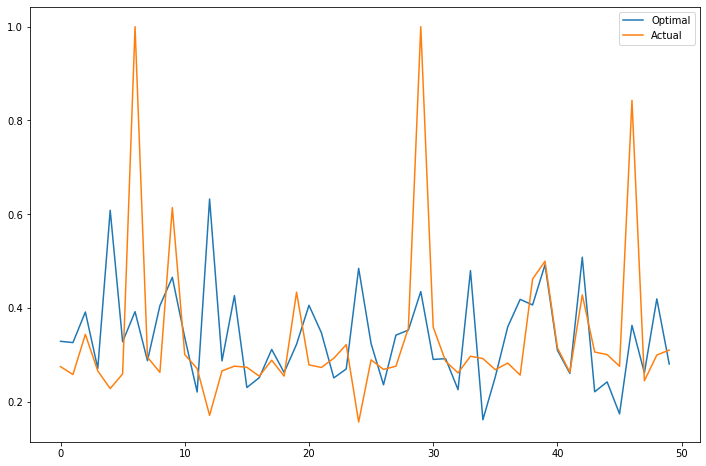

In [24]:
fig = plt.figure(figsize = (12,8))
plt.plot(predictions1[:50], label = 'Optimal')
plt.plot(y_test[:50], label = 'Actual')
plt.legend()

In [25]:
predictions2 = svr2.predict(X_test)

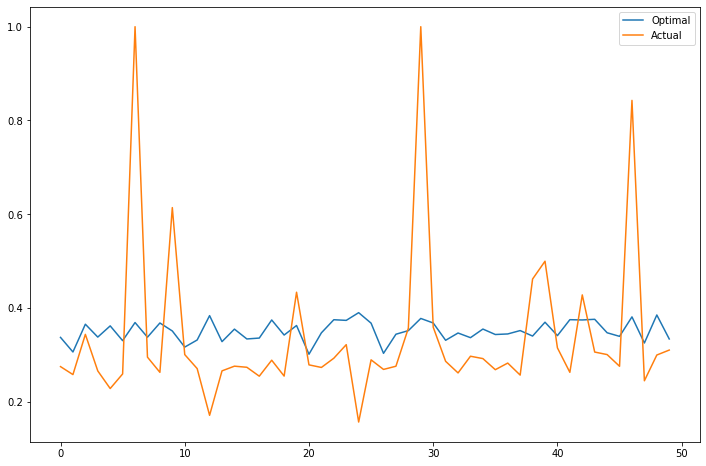

In [26]:
fig = plt.figure(figsize = (12,8))
plt.plot(predictions2[:50], label = 'Optimal')
plt.plot(y_test[:50], label = 'Actual')
plt.legend()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
mean_absolute_error(y_test, predictions1)

0.10702785363725782

In [29]:
mean_squared_error(y_test, predictions1)

0.025285262849815433

In [30]:
np.sqrt(mean_squared_error(y_test, predictions1))

0.15901340462305508

In [31]:
mean_absolute_error(y_test, predictions2)

0.09926261339060975

In [32]:
mean_squared_error(y_test, predictions2)

0.022387644415387743

In [33]:
np.sqrt(mean_squared_error(y_test, predictions2))

0.149625012666291

# Predicting the Infect_Prob in Test Dataset

In [34]:
ds = pd.read_excel("Train_dataset.xlsx",sheet_name = "Train_dataset")
ds1 = pd.read_excel("Test_dataset.xlsx")
ds2= pd.read_excel("Test_dataset.xlsx")

In [35]:
ds.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [36]:
ds1.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,...,109,207,312,94,68,39,5,2300000,1500000,1


# Preprocessing of Train Dataset

### Dropping of Attribute

In [37]:
ds.drop(["salary","Insurance","Married","Children","people_ID","Designation","Name"], axis = 1, inplace = True)

In [38]:
ds.head()

,Region,Gender,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,...,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,Bhubaneshwar,Female,Farmer,Public,2,0,Hypertension,68,8,<400,...,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010
1,Bhubaneshwar,Female,Farmer,Walk,2,0,Diabetes,64,15,<100,...,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880
2,Bhubaneshwar,Female,Cleaner,Public,2,0,None,19,13,<300,...,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000
3,Bhubaneshwar,Female,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,...,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225
4,Bhubaneshwar,Female,Manufacturing,Car,2,0,Diabetes,23,7,<400,...,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800


### Filling Missing Values

In [39]:
ds_null = ds.columns[ds.isnull().any()]
ds[ds_null].isnull().sum()

Occupation                 747
Mode_transport               3
comorbidity                226
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
FT/month                   723
dtype: int64

In [40]:
ds_categ = list(ds.select_dtypes(exclude = ["number"]).columns)
ds_categ

['Region',
 'Gender',
 'Occupation',
 'Mode_transport',
 'comorbidity',
 'Pulmonary score',
 'cardiological pressure']

In [41]:
ds["Mode_transport"].fillna(method ='ffill', inplace = True)
ds["comorbidity"].fillna(method ='ffill', inplace = True)
ds["cardiological pressure"].fillna(method ='ffill', inplace = True)
ds["Diuresis"].fillna(method ='ffill', inplace = True)
ds["Platelets"].fillna(method ='ffill', inplace = True)
ds["HBB"].fillna(method ='ffill', inplace = True)
ds["d-dimer"].fillna(method ='ffill', inplace = True)
ds["Heart rate"].fillna(method ='ffill', inplace = True)
ds["HDL cholesterol"].fillna(method ='ffill', inplace = True)
ds["FT/month"].fillna(method ='ffill', inplace = True)
ds["Occupation"].fillna(method ='ffill', inplace = True)

In [42]:
ds.head()

,Region,Gender,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,...,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,Bhubaneshwar,Female,Farmer,Public,2,0,Hypertension,68,8,<400,...,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010
1,Bhubaneshwar,Female,Farmer,Walk,2,0,Diabetes,64,15,<100,...,441.0,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880
2,Bhubaneshwar,Female,Cleaner,Public,2,0,None,19,13,<300,...,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000
3,Bhubaneshwar,Female,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,...,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225
4,Bhubaneshwar,Female,Manufacturing,Car,2,0,Diabetes,23,7,<400,...,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800


In [43]:
ds_categ = list(ds.select_dtypes(exclude = ["number"]).columns)
ds_categ

['Region',
 'Gender',
 'Occupation',
 'Mode_transport',
 'comorbidity',
 'Pulmonary score',
 'cardiological pressure']

### Converting Categorical Value to Continous Value using Label Encoder

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ds_categ:
    print(ds[i].unique())
    ds[i] = le.fit_transform(ds[i])

['Bhubaneshwar' 'Chandigarh' 'Chennai' 'Delhi' 'Bengaluru']
['Female' 'Male']
['Farmer' 'Cleaner' 'Driver' 'Manufacturing' 'Clerk' 'Sales' 'Business'
 'Researcher' 'Legal']
['Public' 'Walk' 'Car']
['Hypertension' 'Diabetes' 'None' 'Coronary Heart Disease']
['<400' '<100' '<300' '<200']
['Normal' 'Stage-02' 'Elevated' 'Stage-01']


In [45]:
ds.head()

,Region,Gender,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,...,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,1,0,4,1,2,0,2,68,8,3,...,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010
1,1,0,4,2,2,0,1,64,15,0,...,441.0,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880
2,1,0,1,1,2,0,3,19,13,2,...,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000
3,1,0,3,0,2,0,0,33,9,1,...,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225
4,1,0,6,0,2,0,1,23,7,3,...,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800


# Preprocessing of Test dataset

### Dropping of Attribute

In [46]:
ds1.drop(["salary","Insurance","Married","Children","people_ID","Designation","Name"], axis = 1, inplace = True)

In [47]:
ds1.head()

,Region,Gender,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month
0,Delhi,Female,Driver,Public,4,1,Diabetes,52,3,<200,Stage-01,388,153,196,240,85,53,17,3,1
1,Delhi,Male,Legal,Walk,4,1,Diabetes,53,11,<200,Stage-01,409,95,138,241,81,61,2,5,1
2,Delhi,Female,Sales,Car,4,1,Diabetes,35,9,<100,Stage-02,440,40,166,236,88,47,24,3,2
3,Delhi,Female,Sales,Car,4,1,None,31,12,<300,Elevated,206,78,83,211,87,52,13,6,2
4,Delhi,Female,Business,Car,4,1,Diabetes,51,6,<200,Stage-01,229,109,207,312,94,68,39,5,1


In [48]:
ds1_null = ds1.columns[ds1.isnull().any()]
ds1[ds1_null].isnull().sum()

Series([], dtype: float64)

In [49]:
ds1_categ = list(ds1.select_dtypes(exclude = ["number"]).columns)
ds1_categ

['Region',
 'Gender',
 'Occupation',
 'Mode_transport',
 'comorbidity',
 'Pulmonary score',
 'cardiological pressure']

### Converting Categorical Value to Continous Value using Label Encoder

In [50]:
le = LabelEncoder()
for i in ds1_categ:
    print(ds1[i].unique())
    ds1[i] = le.fit_transform(ds1[i])

['Delhi' 'Hyderabad' 'Kolkata' 'Mumbai' 'Pune' 'Thiruvananthapuram']
['Female' 'Male']
['Driver' 'Legal' 'Sales' 'Business' 'Manufacturing' 'Researcher' 'Clerk'
 'Cleaner' 'Farmer']
['Public' 'Walk' 'Car']
['Diabetes' 'None' 'Hypertension' 'Coronary Heart Disease']
['<200' '<100' '<300' '<400']
['Stage-01' 'Stage-02' 'Elevated' 'Normal']


In [51]:
ds1.head()

,Region,Gender,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month
0,0,0,3,1,4,1,1,52,3,1,2,388,153,196,240,85,53,17,3,1
1,0,1,5,2,4,1,1,53,11,1,2,409,95,138,241,81,61,2,5,1
2,0,0,8,0,4,1,1,35,9,0,3,440,40,166,236,88,47,24,3,2
3,0,0,8,0,4,1,3,31,12,2,0,206,78,83,211,87,52,13,6,2
4,0,0,0,0,4,1,1,51,6,1,2,229,109,207,312,94,68,39,5,1


In [52]:
ds.shape

(10714, 21)

In [53]:
ds1.shape

(14498, 20)

### Using MinMax Scaler for Normalization

In [54]:
X = ds.iloc[:,0:20]
y = ds.iloc[:,[20]]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler2=MinMaxScaler()
X_train = scaler.fit_transform(X)
y = np.reshape(np.array(y), (-1,1))
y_train = scaler2.fit_transform(y)

In [55]:
X_train.shape

(10714, 20)

In [56]:
y_train.shape

(10714, 1)

In [57]:
A = ds1.iloc[:,0:20]

In [58]:
scaler = MinMaxScaler()
X_test = scaler.fit_transform(A)

In [59]:
X_test.shape

(14498, 20)

### Using Support Vector Regression  and Rbf Kernel to train and predict 

In [60]:
from sklearn.svm import SVR

In [61]:
svr1 = SVR(kernel = 'rbf',gamma=1, C = 10000)

In [62]:
svr1.fit(X_train,y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [63]:
predictions = svr1.predict(X_test)

In [64]:
predictions

array([0.3110863 , 0.1770541 , 0.39196694, ..., 0.31698201, 0.36214272,
       0.43107876])

In [65]:
temp=predictions.reshape(-1,1)
temp=scaler2.inverse_transform(temp)

In [66]:
y = pd.DataFrame(temp)
y

,0
0,50.549984
1,41.389902
2,56.077561
3,53.983106
4,50.609716
...,...
14493,52.613597
14494,53.654809
14495,50.952911
14496,54.039303


In [67]:
testpplid=ds2.iloc[:,0].values

In [68]:
import xlsxwriter 
  
workbook = xlsxwriter.Workbook('part1.xlsx') 
worksheet = workbook.add_worksheet() 
  
row = 1
row_id=0
column_id = 0
column=1
worksheet.write(0,0,'people_Id')
worksheet.write(0,1,'Infect_Prob')
  
for i in range(len(temp)) : 
  
    
    worksheet.write(row, column_id, testpplid[i])
    worksheet.write(row, column, temp[i]) 
    
    row += 1
      
workbook.close() 